# |> HR Analysis 
# |> Yossef Essam
# |> Meriskill Company

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from a CSV file
data = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [4]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(data.head())


First Few Rows of the Dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardH

In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics of numerical features
print("\nSummary Statistics:")
print(data.describe())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

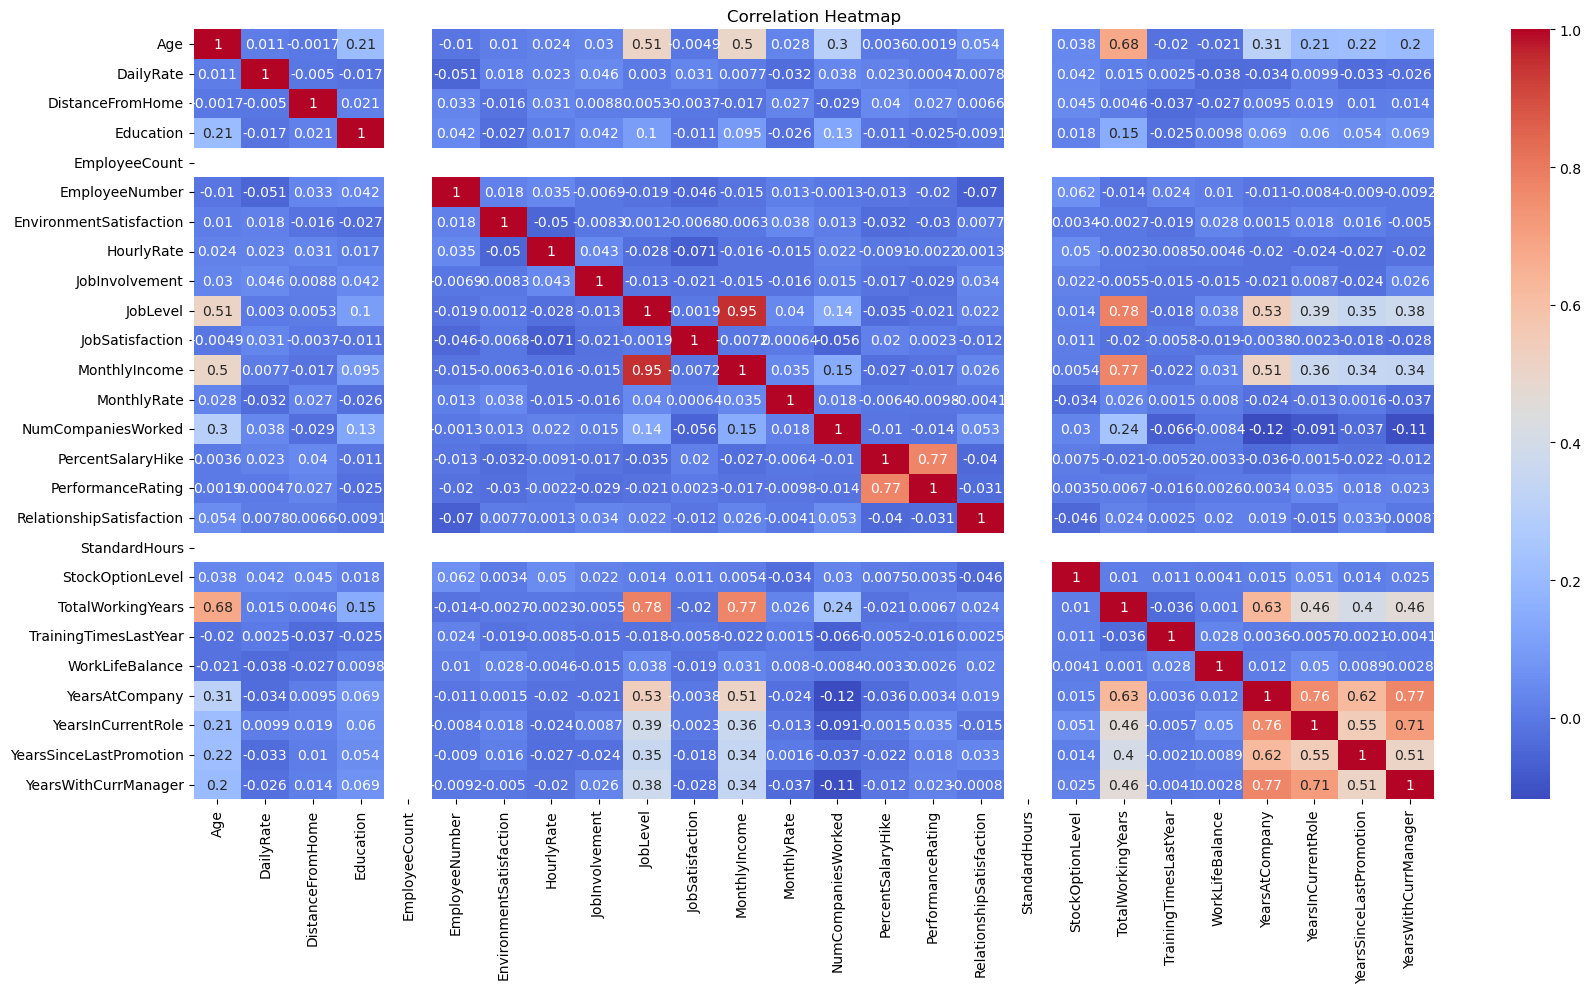

In [6]:
# Correlation heatmap
numeric = data.select_dtypes(include='number')
correlation_matrix = numeric.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
#Remove redundent columns and duplicated values 
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
data = data.drop_duplicates()
data = data.dropna()

In [8]:
# Mappimg non numbering values
Nonumber = ['Attrition', 'Gender', 'MaritalStatus', 'OverTime']
category_mapping = {'Male': 0, 'Female': 1, 'Single':0, 'Married': 1, 'No':0, 'Yes':1}
for i in Nonumber:
    data[i]= data[i].map(category_mapping)

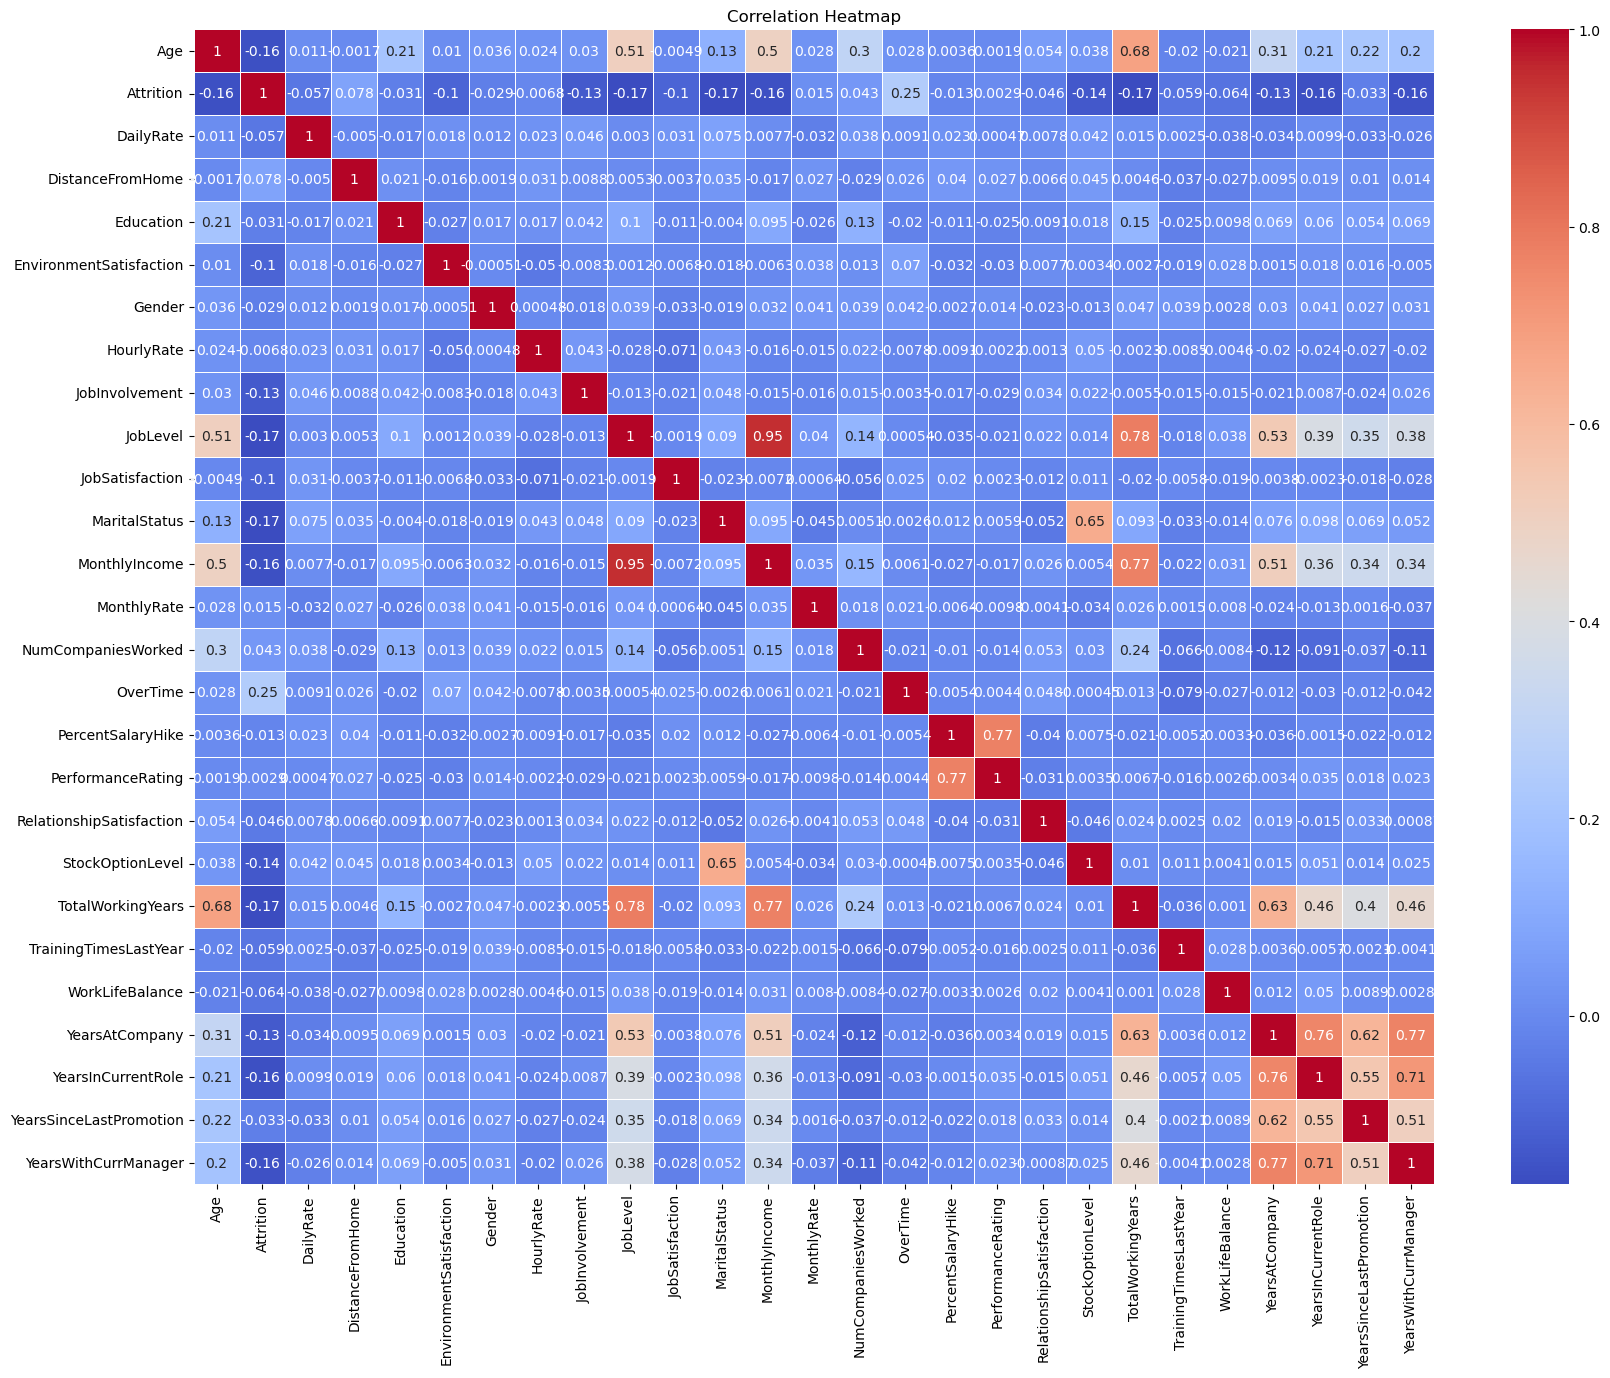

In [9]:
# Correlation heatmap
numeric = data.select_dtypes(include='number')
correlation_matrix = numeric.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

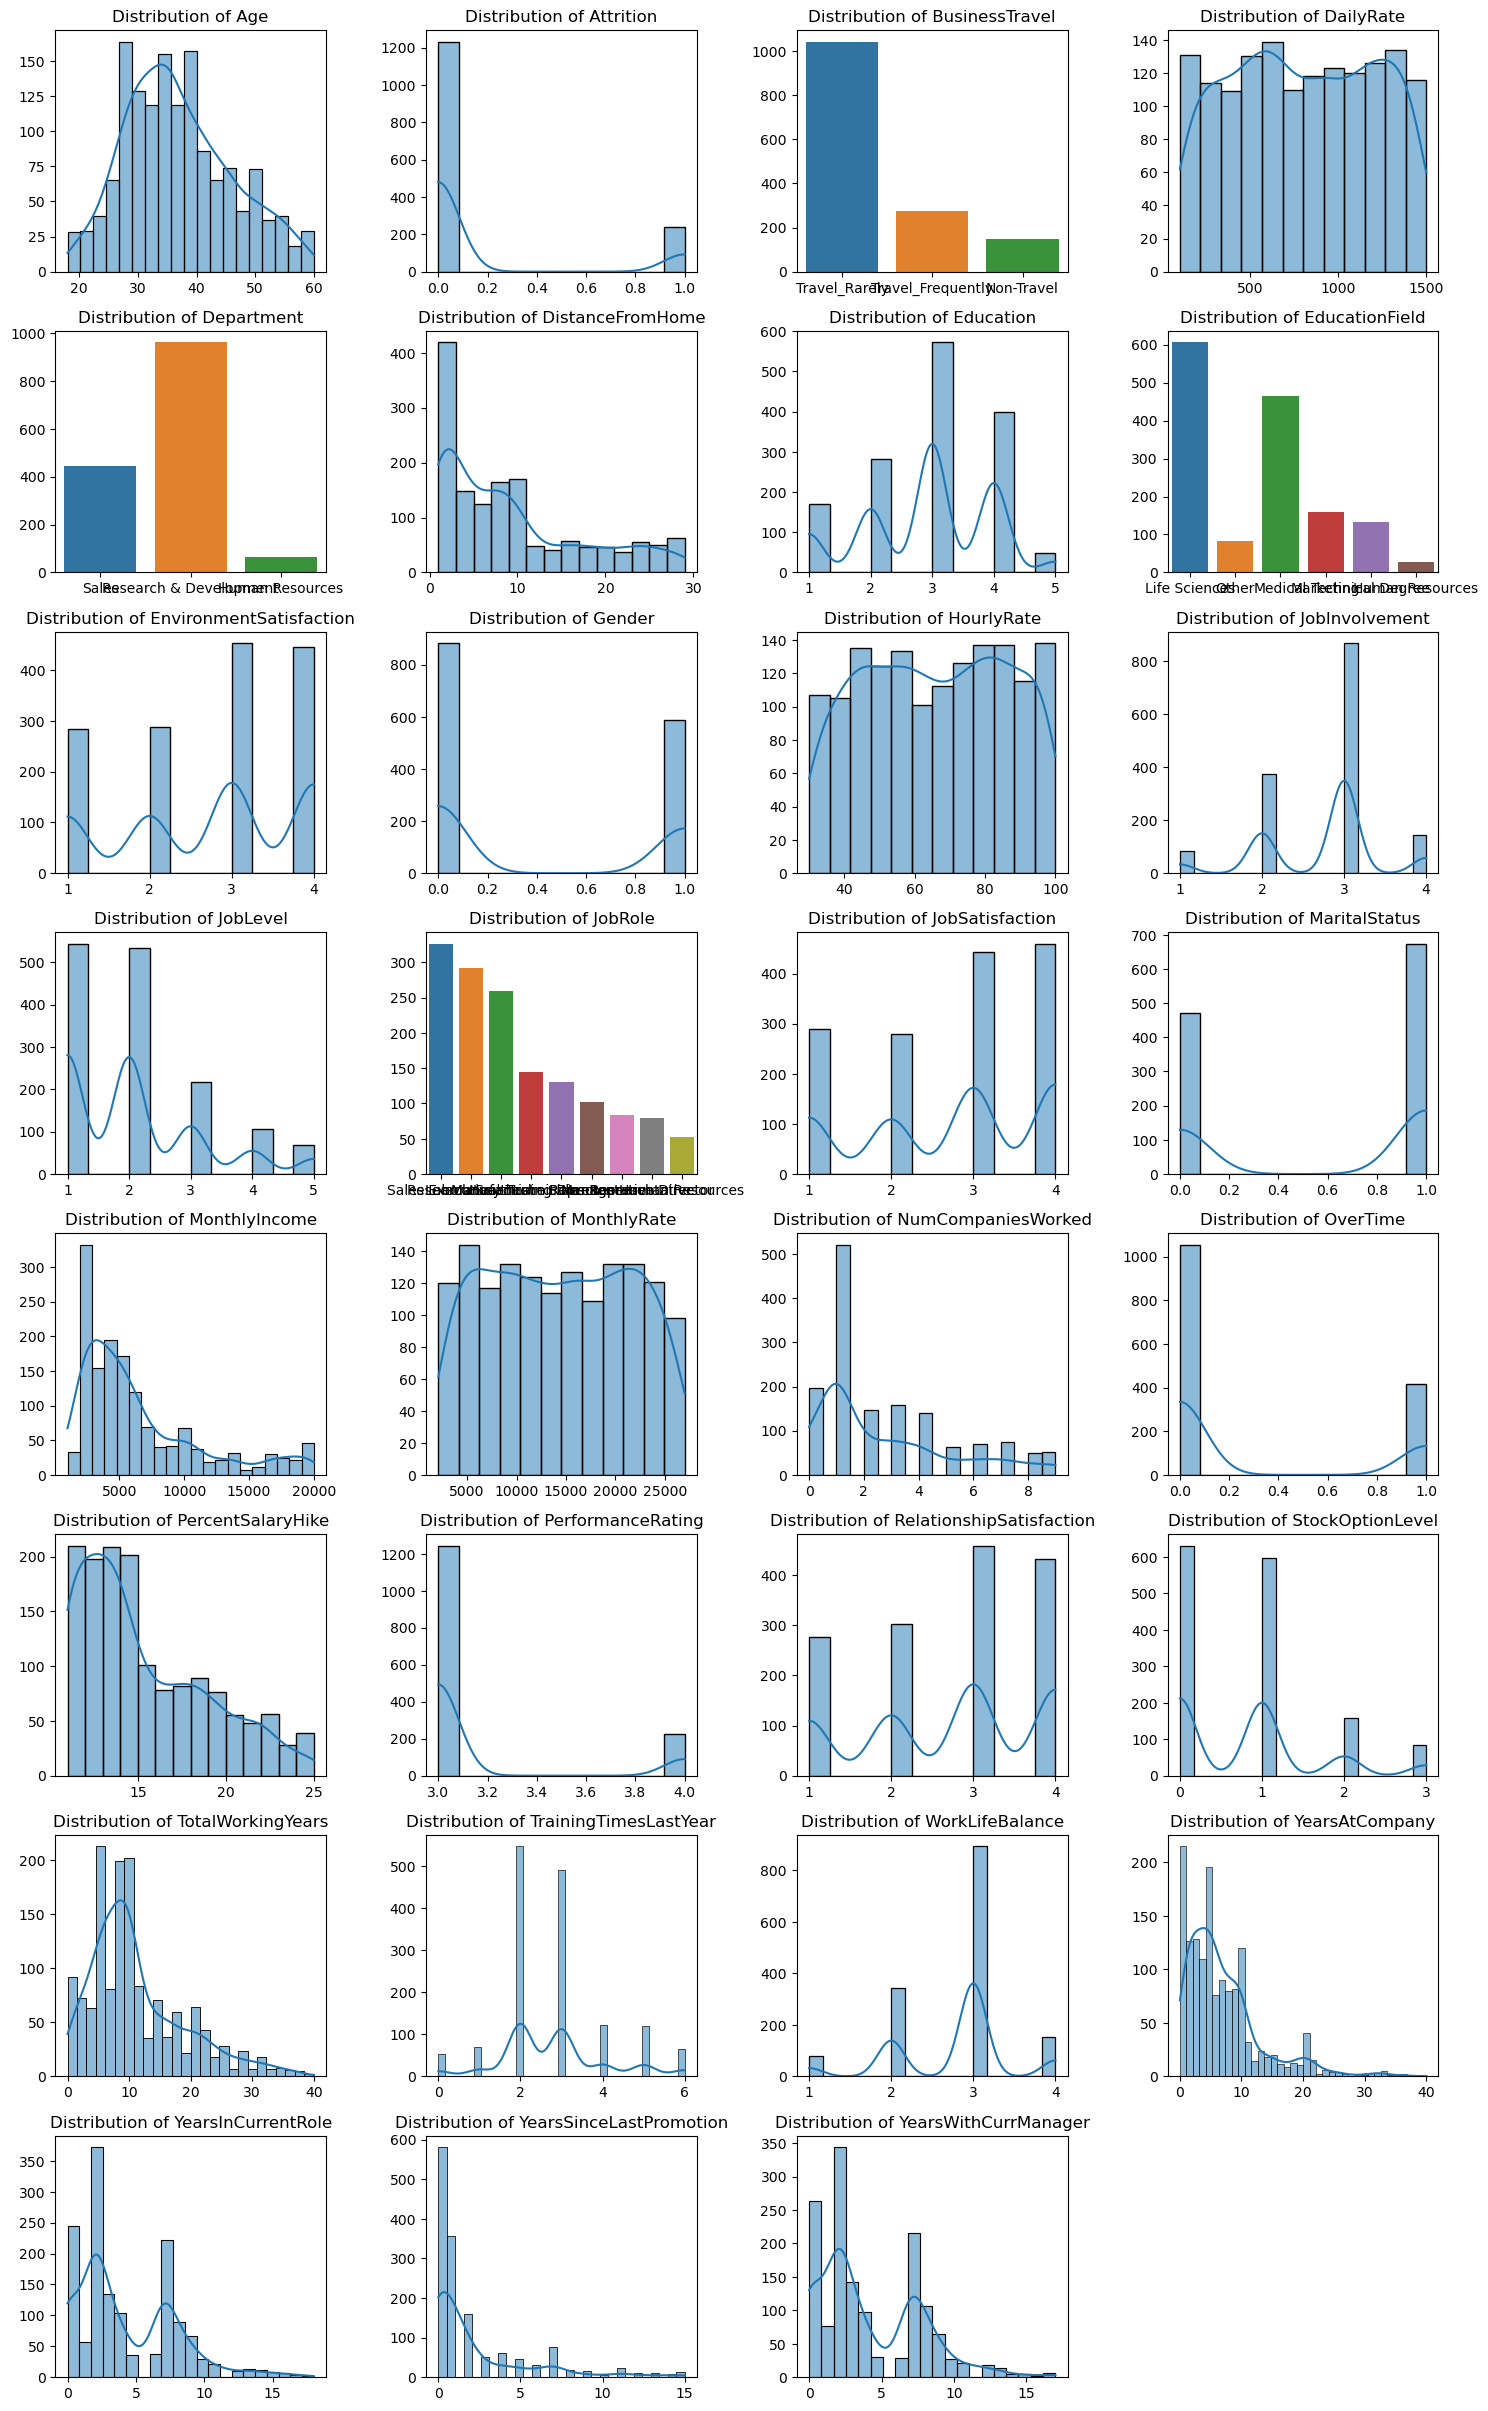

In [10]:
num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, 3 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()
for i, col in enumerate(data.columns):
    ax = axes[i]
    if pd.api.types.is_numeric_dtype(data[col]):
        # For numeric columns, create a histogram or density plot
        sns.histplot(data=data, x=col, kde=True, ax=ax)
    else:
        # For categorical columns, create a bar plot of value counts
        sns.countplot(data=data, x=col, ax=ax)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove any empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


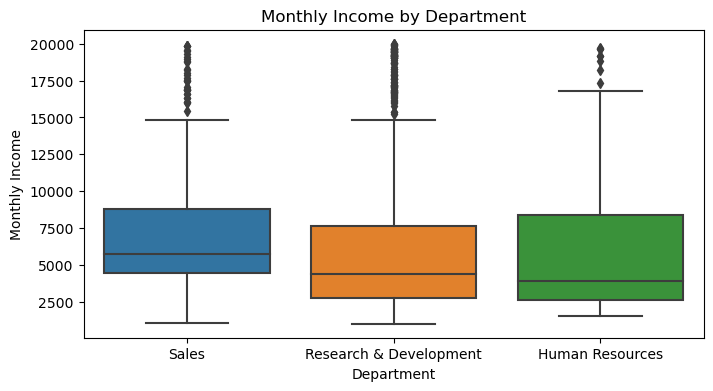

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Department', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks()
plt.show()

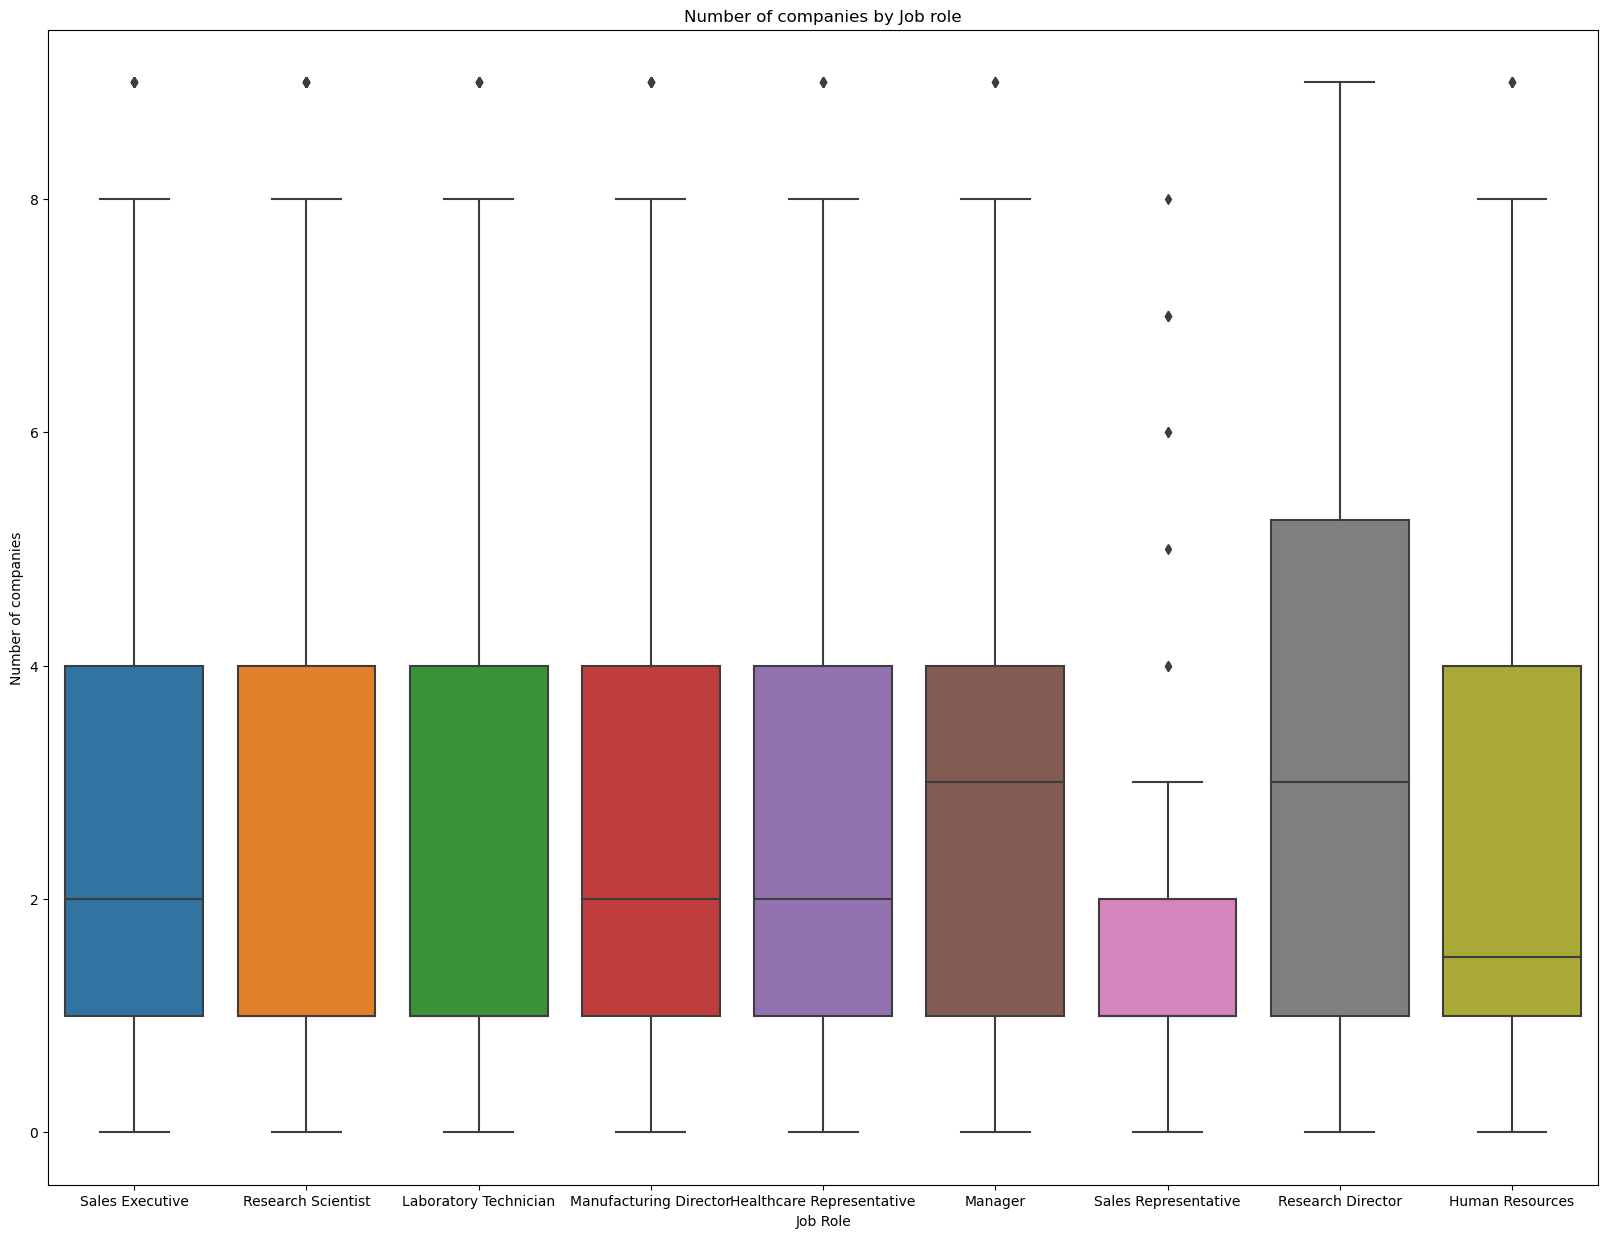

In [12]:
plt.figure(figsize=(20, 15))
sns.boxplot(y='NumCompaniesWorked', x='JobRole', data=data)
plt.title('Number of companies by Job role')
plt.xlabel('Job Role')
plt.ylabel('Number of companies')
plt.xticks()
plt.show()

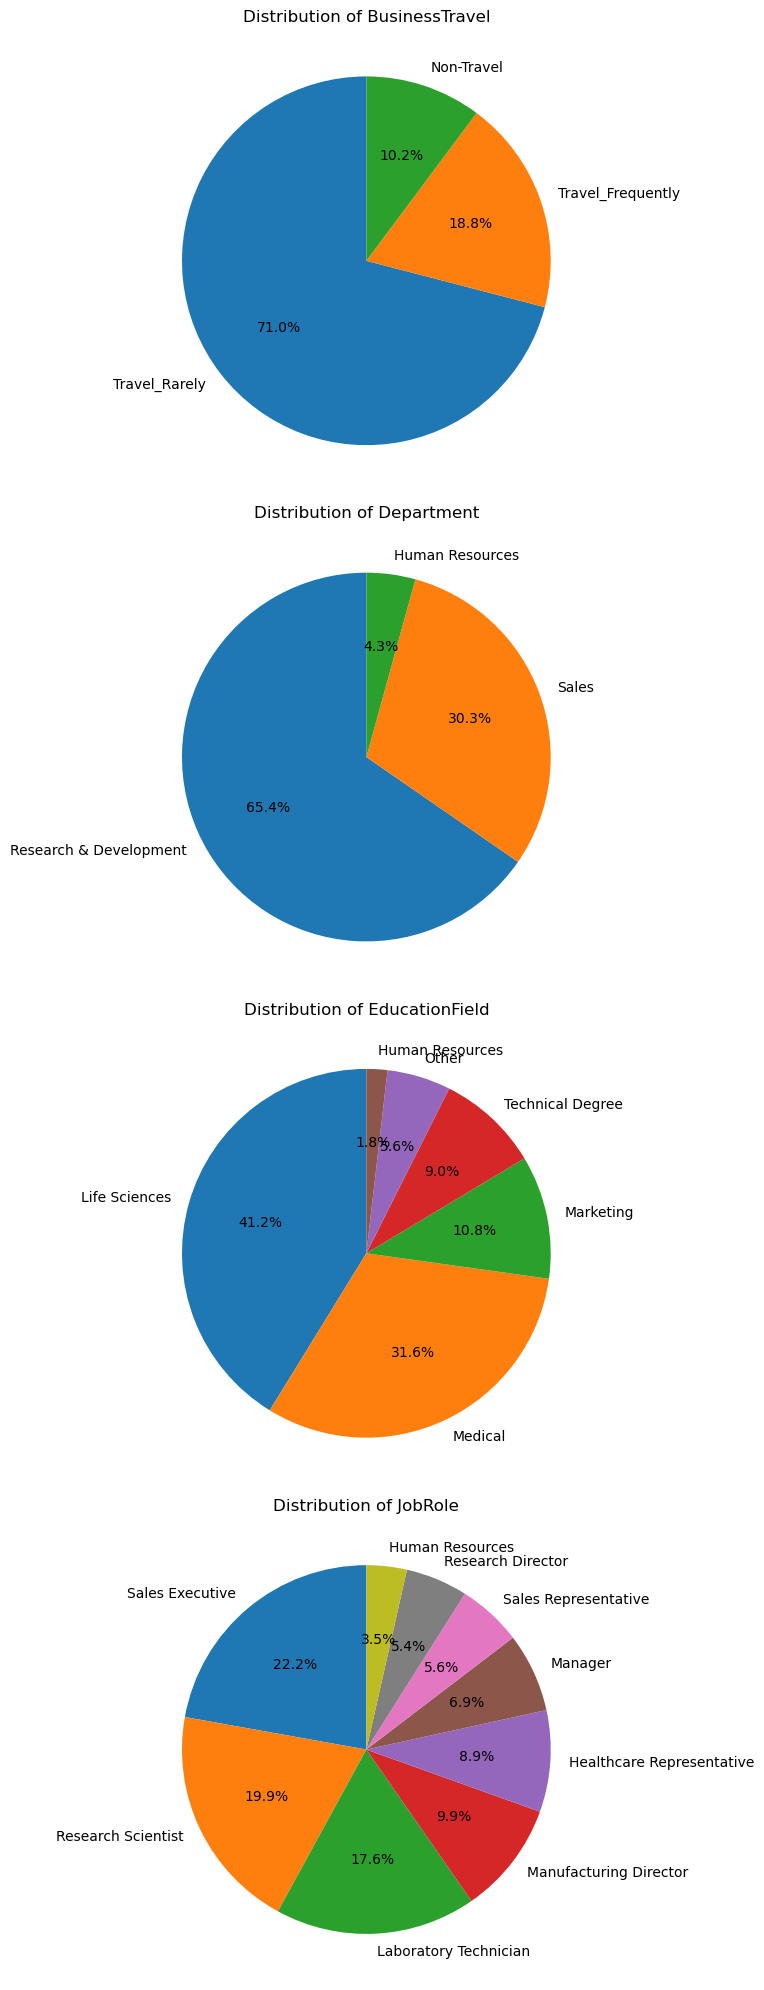

In [13]:
categorical_columns = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
num_rows = len(categorical_columns)
 

# Create a figure and specify the number of rows and columns for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(25, 5 * num_rows))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Iterate through each non-empty categorical column and create a pie chart
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = data[col].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {col}')

# Remove any empty subplots
for i in range(num_rows, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()